<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/%EC%A0%95%EC%9C%A0%EC%84%9D_%E1%84%92%E1%85%A1%E1%86%AB%E1%84%8B%E1%85%A7%E1%86%BC%E1%84%80%E1%85%B5%E1%84%80%E1%85%A8%E1%84%87%E1%85%A5%E1%86%AB%E1%84%8B%E1%85%A7%E1%86%A8(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


Text(0.5, 1.0, '한글 제목')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_te

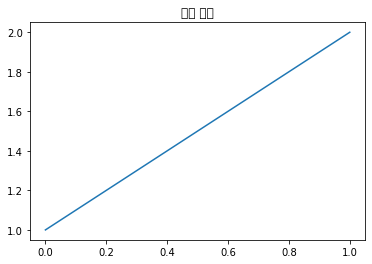

In [ ]:
plt.plot([1,2])
plt.title("한글 제목")

In [57]:
import re
import os
import unicodedata
import urllib3
import zipfile
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm.notebook import tqdm

from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Download the data


In [3]:
!gdown --id 1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis
To: /content/1_구어체(1).xlsx
100% 15.8M/15.8M [00:00<00:00, 133MB/s]


In [4]:
http = urllib3.PoolManager()
url ='http://www.manythings.org/anki/kor-eng.zip'
filename = 'kor-eng.zip'
path = os.getcwd()
zipfilename = os.path.join(path, filename)


with http.request('GET', url, preload_content=False) as r, open(zipfilename, 'wb') as out_file:       
    shutil.copyfileobj(r, out_file)

with zipfile.ZipFile(zipfilename, 'r') as zip_ref:
    zip_ref.extractall(path)

In [5]:
import pandas as pd

df = pd.read_excel('/content/1_구어체(1).xlsx')
df

,SID,원문,번역문
0,1,'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...,Bible Coloring' is a coloring application that...
1,2,씨티은행에서 일하세요?,Do you work at a City bank?
2,3,푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.,"PURITO's bestseller, which recorded 4th rough ..."
3,4,11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.,In Chapter 11 Jesus called Lazarus from the to...
4,5,"6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.",I would feel grateful to know how many stocks ...
...,...,...,...
199995,199996,나는 먼저 청소기로 바닥을 밀었어요.,"First of all, I vacuumed the floor."
199996,199997,나는 먼저 팀 과제를 하고 놀러 갔어요.,I did the team assignment first and went out t...
199997,199998,나는 비 같은 멋진 연예인을 좋아해요.,I like cool entertainer like Rain.
199998,199999,나는 멋진 자연 경치를 보고 눈물을 흘렸어.,I cried seeing the amazing scenery.


In [6]:
df = df.drop(['SID'], axis=1)

In [7]:
df.to_csv('kor.txt', sep='\t', index = False)

In [8]:
f = open("kor.txt", 'r')
for i in range(5):
    line = f.readline()
    if not line:break
    print(line)
f.close()

원문	번역문

'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다.	Bible Coloring' is a coloring application that allows you to experience beautiful stories in the Bible.

씨티은행에서 일하세요?	Do you work at a City bank?

푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.	PURITO's bestseller, which recorded 4th rough -cuts by words of mouth from abroad.

11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.	In Chapter 11 Jesus called Lazarus from the tomb and raised him from the dead.



In [9]:
with open('kor.txt', 'r') as fin:
    data = fin.read().splitlines(True)
with open('kor.txt', 'w') as fout:
    fout.writelines(data[1:])

In [10]:
f = open("kor.txt", 'r')
for i in range(5):
    line = f.readline()
    if not line:break
    print(line)
f.close()

'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다.	Bible Coloring' is a coloring application that allows you to experience beautiful stories in the Bible.

씨티은행에서 일하세요?	Do you work at a City bank?

푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.	PURITO's bestseller, which recorded 4th rough -cuts by words of mouth from abroad.

11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.	In Chapter 11 Jesus called Lazarus from the tomb and raised him from the dead.

6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.	I would feel grateful to know how many stocks will be secured of size 6.5, 7, and 8.



## Configuration


In [58]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
hidden_units = 256  # Latent dimensionality of the encoding space.
embedding_dim = 64
num_samples = 200000  # Number of samples to train on.
# num_samples = 50000  # Number of samples to train on.

## Prepare the data

In [ ]:
# from ckonlpy.tag import Twitter
# tokenizer = Twitter()
# # tokenizer.morphs('은경이는 사무실로 갔습니다.')

/usr/local/lib/python3.8/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [59]:
def preprocess_sentence(sent):
  # 악센트 삭제 함수 호출
#   sent = unicode_to_ascii(sent.lower())

  # 단어와 구두점 사이에 공백을 만듭니다.
  # Ex) "he is a boy." => "he is a boy ."
  sent = re.sub(r"([?.!,¿])", r" \1", sent)

  # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환합니다.
  sent = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z!.?]+", r" ", sent)

  # 다수 개의 공백을 하나의 공백으로 치환
  sent = re.sub(r"\s+", " ", sent)
  return sent

In [13]:
# 전처리 테스트
en_sent = u"Have you had dinner?"
kr_sent = u"톰은 우리가 어제 봤던 비싸보이는 빨간 자동차가 자기 것이라고 주장했어."

print('전처리 전 영어 문장 :', en_sent)
print('전처리 후 영어 문장 :',preprocess_sentence(en_sent))
print('전처리 전 한국어 문장 :', kr_sent)
print('전처리 후 한국어 문장 :', preprocess_sentence(kr_sent))

전처리 전 영어 문장 : Have you had dinner?
전처리 후 영어 문장 : Have you had dinner ?
전처리 전 한국어 문장 : 톰은 우리가 어제 봤던 비싸보이는 빨간 자동차가 자기 것이라고 주장했어.
전처리 후 한국어 문장 : 톰은 우리가 어제 봤던 비싸보이는 빨간 자동차가 자기 것이라고 주장했어 .


In [14]:
# Teacher forcing
def load_preprocessed_data():
  encoder_input, decoder_input, decoder_target = [], [], []

  with open("/content/drive/MyDrive/RNN/kor.txt", "r") as lines:
    for i, line in enumerate(lines):
      # source 데이터와 target 데이터 분리
      src_line, tar_line = line.strip().split('\t')

      # source 데이터 전처리
      src_line = [w for w in preprocess_sentence(src_line).split()]

      # target 데이터 전처리
      tar_line = preprocess_sentence(tar_line)
      tar_line_in = [w for w in ("<sos> " + tar_line).split()]  # teacher forcing을 위한 정답셋 
      tar_line_out = [w for w in (tar_line + " <eos>").split()]

      encoder_input.append(src_line) # 클리닝 
      decoder_input.append(tar_line_in) # 클리닝 + sos 
      decoder_target.append(tar_line_out) # 클리닝 + eos 

      if i == num_samples - 1:
        break
                
  return encoder_input, decoder_input, decoder_target

In [15]:
sents_kor_in, sents_en_in, sents_en_out  = load_preprocessed_data()

In [16]:
print('인코더의 입력 :',sents_kor_in[:5])
print('디코더의 입력 :',sents_en_in[:5])
print('디코더의 레이블 :',sents_en_out[:5])

인코더의 입력 : [['Bible', 'Coloring', '은', '성경의', '아름다운', '이야기를', '체험', '할', '수', '있는', '컬러링', '앱입니다', '.'], ['씨티은행에서', '일하세요', '?'], ['푸리토의', '베스트셀러는', '해외에서', '입소문만으로', '차', '완판을', '기록하였다', '.'], ['장에서는', '예수님이', '이번엔', '나사로를', '무덤에서', '불러내어', '죽은', '자', '가운데서', '살리셨습니다', '.'], ['.', '사이즈가', '몇', '개나', '더', '재입고', '될지', '제게', '알려주시면', '감사하겠습니다', '.']]
디코더의 입력 : [['<sos>', 'Bible', 'Coloring', 'is', 'a', 'coloring', 'application', 'that', 'allows', 'you', 'to', 'experience', 'beautiful', 'stories', 'in', 'the', 'Bible', '.'], ['<sos>', 'Do', 'you', 'work', 'at', 'a', 'City', 'bank', '?'], ['<sos>', 'PURITO', 's', 'bestseller', 'which', 'recorded', 'th', 'rough', 'cuts', 'by', 'words', 'of', 'mouth', 'from', 'abroad', '.'], ['<sos>', 'In', 'Chapter', 'Jesus', 'called', 'Lazarus', 'from', 'the', 'tomb', 'and', 'raised', 'him', 'from', 'the', 'dead', '.'], ['<sos>', 'I', 'would', 'feel', 'grateful', 'to', 'know', 'how', 'many', 'stocks', 'will', 'be', 'secured', 'of', 'size', '.', 'and', '.']

단어집합을 생성하겠습니다. 

In [17]:
# 한국어
tokenizer_kor = Tokenizer(filters="", lower=False)
tokenizer_kor.fit_on_texts(sents_kor_in)

# 인코더 데이터
encoder_input = tokenizer_kor.texts_to_sequences(sents_kor_in)

In [18]:
encoder_input

[[27719, 27720, 586, 27721, 463, 349, 7927, 19, 6, 11, 27722, 7928, 1],
 [16948, 16949, 4],
 [27723, 27724, 3498, 27725, 364, 27726, 27727, 1],
 [27728, 27729, 6715, 27730, 27731, 27732, 2624, 2982, 16950, 27733, 1],
 [1, 2789, 132, 2790, 18, 16951, 3499, 601, 1581, 928, 1],
 [1531,
  4163,
  27734,
  27735,
  9,
  1090,
  1298,
  6716,
  104,
  1472,
  9658,
  45,
  27736,
  1],
 [27737, 21, 242, 6717, 1],
 [3,
  16952,
  104,
  5807,
  12180,
  27738,
  33,
  776,
  701,
  33,
  173,
  133,
  6718,
  5808,
  8,
  1],
 [12,
  25,
  1582,
  31,
  1874,
  12181,
  1193,
  482,
  23,
  2,
  213,
  27739,
  27740,
  350,
  305,
  1],
 [176, 1473, 1259, 1030, 571, 109, 1715, 45, 16953, 475, 1],
 [2, 1334, 3, 27741, 272, 7929, 6719, 572, 1],
 [788, 1474, 21, 16954, 1],
 [788, 4600, 12182, 1],
 [46, 48, 3500, 1091, 7930, 5809, 27742, 1],
 [39, 9659, 16955, 27743, 243, 127, 423, 27744, 27745, 1],
 [171, 16956, 1639, 86, 635, 1260, 351, 4],
 [886,
  27746,
  27747,
  27748,
  20,
  442,
  1695

In [19]:
# 영어
tokenizer_en = Tokenizer(filters="", lower=False)
tokenizer_en.fit_on_texts(sents_en_in)
tokenizer_en.fit_on_texts(sents_en_out)

# 디코더 데이터
decoder_input = tokenizer_en.texts_to_sequences(sents_en_in)
decoder_target = tokenizer_en.texts_to_sequences(sents_en_out)

In [20]:
decoder_input[-5:]

[[3, 5, 278, 6, 1651, 97, 8, 2, 2039, 15, 2, 159, 219, 1],
 [3, 5, 26, 63, 283, 35, 2, 159, 428, 1],
 [3, 5, 26, 748, 15, 2, 159, 983, 153, 1],
 [3, 5, 60, 93, 6, 1719, 47, 251, 159, 929, 1],
 [3, 5, 180, 12, 63, 74, 1006, 15, 159, 235, 17, 286, 1]]

In [21]:
decoder_target[-5:]

[[5, 278, 6, 1651, 97, 8, 2, 2039, 15, 2, 159, 219, 1, 4],
 [5, 26, 63, 283, 35, 2, 159, 428, 1, 4],
 [5, 26, 748, 15, 2, 159, 983, 153, 1, 4],
 [5, 60, 93, 6, 1719, 47, 251, 159, 929, 1, 4],
 [5, 180, 12, 63, 74, 1006, 15, 159, 235, 17, 286, 1, 4]]

각 문장을 입력층의 최대 길이만큼 패딩(padding)을 수행합니다. 

In [22]:
encoder_input = pad_sequences(encoder_input, padding='post')
decoder_input = pad_sequences(decoder_input, padding='post')
decoder_target = pad_sequences(decoder_target, padding='post')

In [23]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

인코더의 입력의 크기(shape) : (50000, 26)
디코더의 입력의 크기(shape) : (50000, 44)
디코더의 레이블의 크기(shape) : (50000, 44)


샘플은 총 33,000개 존재하며 영어 문장의 길이는 8, 프랑스어 문장의 길이는 16입니다. 단어 집합의 크기를 정의합니다.


In [24]:
src_vocab_size = len(tokenizer_kor.word_index) + 1
tar_vocab_size = len(tokenizer_en.word_index) + 1

print(f"영어 단어 집합의 크기 : {src_vocab_size}, 한국어 단어 집합의 크기 : {tar_vocab_size}")

영어 단어 집합의 크기 : 82766, 한국어 단어 집합의 크기 : 23702


단어로부터 정수를 얻는 딕셔너리와 정수로부터 단어를 얻는 딕셔너리를 각각 만들어줍니다. 이들은 훈련을 마치고 예측값과 실제값을 비교하는 단계에서 사용합니다. 

In [25]:
src_to_index = tokenizer_kor.word_index  # word : idx
index_to_src = tokenizer_kor.index_word  # idx : word
tar_to_index = tokenizer_en.word_index # word : idx
index_to_tar = tokenizer_en.index_word # idx : word

In [26]:
index_to_src[1223], index_to_tar[1223]

('오랜', 'considered')

In [27]:
print(src_to_index)
# print(index_to_src[:5])

{'.': 1, '나는': 2, '그': 3, '?': 4, '그는': 5, '수': 6, '그녀는': 7, '있습니다': 8, '그리고': 9, '그래서': 10, '있는': 11, '그들은': 12, '있어요': 13, '합니다': 14, '나': 15, '그것은': 16, '것': 17, '더': 18, '할': 19, '한': 20, '내': 21, '해요': 22, '때문에': 23, '월': 24, '내가': 25, '이': 26, '잘': 27, '있어': 28, '가장': 29, '때': 30, '것을': 31, '것입니다': 32, '위해': 33, '많은': 34, '그러나': 35, '그가': 36, '년': 37, '많이': 38, '다른': 39, '안': 40, '저는': 41, '그의': 42, '너무': 43, '그럼': 44, '대한': 45, '네가': 46, '하고': 47, '하는': 48, '일': 49, '그녀가': 50, '것이': 51, '좋은': 52, '다시': 53, '그녀의': 54, '대해': 55, '정말': 56, '매우': 57, '함께': 58, '것이에요': 59, '했어요': 60, '그런데': 61, '것은': 62, '제가': 63, '거예요': 64, '후': 65, '우리': 66, '같아': 67, '우리는': 68, '게': 69, '같은': 70, '싶어': 71, '거야': 72, '바랍니다': 73, '나의': 74, '같이': 75, '좀': 76, '지금': 77, '어떻게': 78, '가지고': 79, '당신이': 80, '싶습니다': 81, '있나요': 82, '그것을': 83, '일을': 84, '주세요': 85, '그냥': 86, '알고': 87, '됩니다': 88, '큰': 89, '모든': 90, '했습니다': 91, '그들이': 92, '될': 93, '없습니다': 94, '보고': 95, '내일': 96, '갈': 97, '그건': 98, '번': 99, '되었습니

테스트 데이터를 분리하겠습니다. 인코더 input, 디코더 input, 디코더 output이 동일하게 분리되어야 하기 때문에 랜덤한 정수배열을 만들어 직접 나누겠습니다. 

우선 랜덤하게 시퀀스를 섞습니다. 

In [28]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [13576  9545 49983 ... 10029 48898  4753]


In [29]:
# 배열
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [30]:
decoder_input[indices[0]], decoder_target[indices[0]]

(array([   3,   20, 6118,  350,  230,   52,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       dtype=int32),
 array([  20, 6118,  350,  230,   52,    1,    4,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       dtype=int32))

`<sos>` `<eos>` 토큰을 제외한 다른 단어들은 동일한 인덱스를 갖고 있어야 합니다. 

10%의 데이터를 test데이터로 분리하겠습니다. 

In [31]:
n_of_val = int(num_samples*0.1) # 900

encoder_input_train = encoder_input[:-n_of_val] 
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [32]:
print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)

훈련 source 데이터의 크기 : (45000, 26)
훈련 target 데이터의 크기 : (45000, 44)
훈련 target 레이블의 크기 : (45000, 44)
테스트 source 데이터의 크기 : (5000, 26)
테스트 target 데이터의 크기 : (5000, 44)
테스트 target 레이블의 크기 : (5000, 44)


## Modeling


In [60]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

인코더

In [112]:
from tensorflow.keras.layers import Input

# 인코더
encoder_inputs = Input(shape=(None, ))

# 임베딩 층
enc_emb = Embedding(src_vocab_size, embedding_dim)(encoder_inputs)

# 상태값 리턴을 위해 return_state는 True
encoder_lstm = LSTM(hidden_units, return_state = True, return_sequences=True)
encoder_lstm2 = LSTM(hidden_units, return_state = True, return_sequences=True)
encoder_lstm3 = LSTM(hidden_units, return_state = True)

encoder_outputs, state_h, state_c =  encoder_lstm(enc_emb)# 은닉 상태와 셀 상태를 리턴
encoder_outputs2, state_h2, state_c2 =  encoder_lstm2(encoder_outputs)# 은닉 상태와 셀 상태를 리턴
encoder_outputs3, state_h3, state_c3 =  encoder_lstm3(encoder_outputs2)# 은닉 상태와 셀 상태를 리턴
encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 저장
encoder_states2 = [state_h2, state_c2] # 인코더의 은닉 상태와 셀 상태를 저장
encoder_states3 = [state_h3, state_c3] # 인코더의 은닉 상태와 셀 상태를 저장

total_encoder_states = [*encoder_states, *encoder_states2, *encoder_states3]

In [84]:
enc_emb

<KerasTensor: shape=(None, None, 64) dtype=float32 (created by layer 'embedding_11')>

In [85]:
encoder_outputs

<KerasTensor: shape=(None, None, 256) dtype=float32 (created by layer 'lstm_11')>

In [86]:
encoder_lstm

In [88]:
enc_emb

<KerasTensor: shape=(None, None, 64) dtype=float32 (created by layer 'embedding_12')>

In [89]:
encoder_outputs

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_13')>

In [90]:
encoder_lstm

디코더에서는 attention layer를 추가합니다. 
- 이때, s_는 은닉상태와 디코더의 최종 출력은 연결해야 하므로, shape을 맞춰주기 위하여 축을 추가합니다. 
- attention layer는 디코더의 은닉상태와 인코더의 은닉상태 전체를 받아 컨텍스트 벡터를 생성합니다. 
- 마지막으로 생성한 컨텍스트 벡터와 디코더의 은닉상태 전체를 softmax layer에 넣고 인덱스를 예측합니다. 


어텐션

In [63]:
from tensorflow.keras.layers import Attention
# 디코더
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(tar_vocab_size, hidden_units) # 임베딩 층
dec_emb = dec_emb_layer(decoder_inputs) # 임베딩 결과

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True) 
decoder_lstm2 = LSTM(hidden_units, return_sequences=True, return_state = True)
decoder_lstm3 = LSTM(hidden_units, return_sequences=True, return_state = True)

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, _ , _ = decoder_lstm(dec_emb,initial_state=encoder_states)
decoder_outputs2, _, _ = decoder_lstm2(decoder_outputs, initial_state = encoder_states2)
decoder_outputs3, _, _ = decoder_lstm3(decoder_outputs2, initial_state = encoder_states3)

# attention
S_ = tf.concat([state_h3[:, tf.newaxis, :], decoder_outputs3[:, :-1, :]], axis=1) # query 

attention = Attention(hidden_units)
context_vector, _ = attention([ S_, encoder_outputs3], return_attention_scores = True)

concat = tf.concat([decoder_outputs3, context_vector], axis=-1)

# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(tar_vocab_size, activation='softmax')
decoder_outputs_l = decoder_dense(concat)

In [64]:
# 학습용 번역기 # 모델의 입력과 출력을 정의.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs_l)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 64)     5297024     ['input_1[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, None, 256)    6067712     ['input_3[0][0]']                
                                                                                              

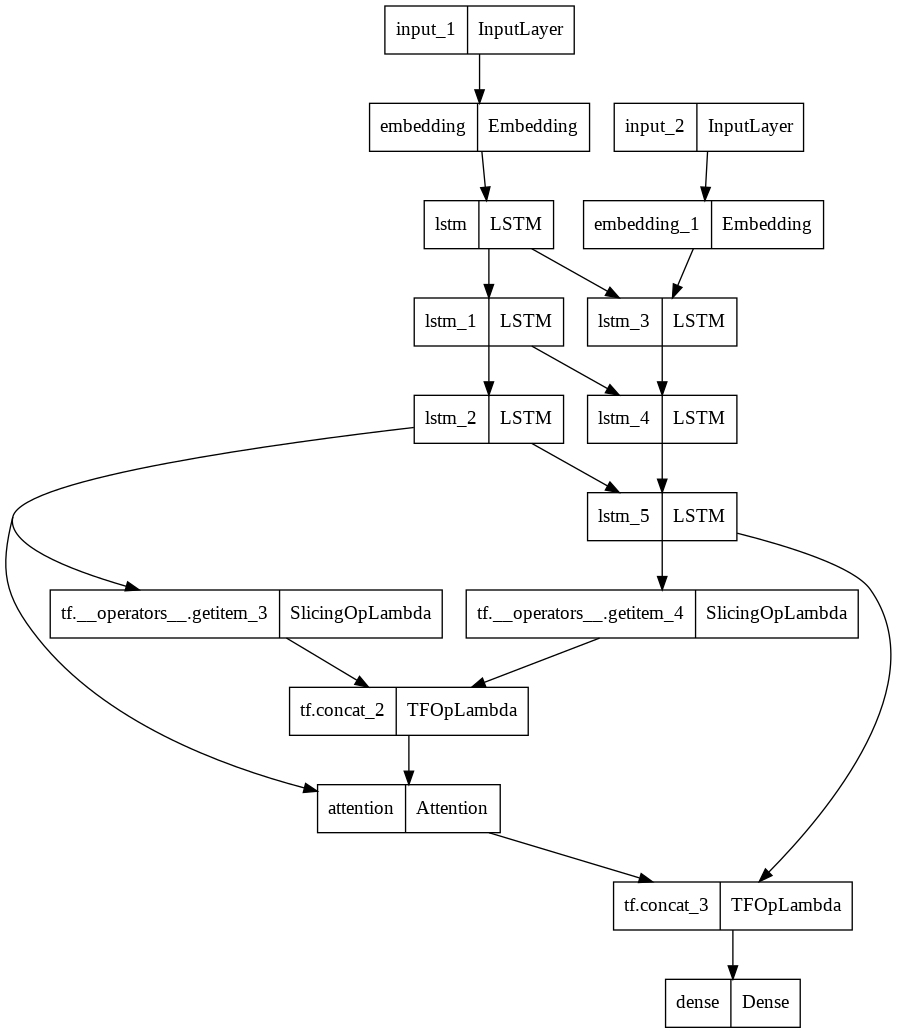

In [65]:
tf.keras.utils.plot_model(model, to_file='model.png' )

In [43]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create a callback for early stopping with a patience of 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/RNN/model.h5',
                             monitor='val_loss',
                             save_best_only=True)

In [45]:
model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, 
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=128, epochs=50, callbacks=[checkpoint, early_stopping])

Epoch 1/50
352/352 [==============================] - 91s 231ms/step - loss: 2.1972 - acc: 0.7132 - val_loss: 1.8847 - val_acc: 0.7231
Epoch 2/50
352/352 [==============================] - 85s 240ms/step - loss: 1.7090 - acc: 0.7591 - val_loss: 1.6474 - val_acc: 0.7682
Epoch 3/50
352/352 [==============================] - 85s 241ms/step - loss: 1.5790 - acc: 0.7724 - val_loss: 1.5823 - val_acc: 0.7734
Epoch 4/50
352/352 [==============================] - 85s 240ms/step - loss: 1.5066 - acc: 0.7774 - val_loss: 1.5466 - val_acc: 0.7767
Epoch 5/50
352/352 [==============================] - 85s 242ms/step - loss: 1.4492 - acc: 0.7819 - val_loss: 1.5137 - val_acc: 0.7790
Epoch 6/50
352/352 [==============================] - 85s 241ms/step - loss: 1.3851 - acc: 0.7869 - val_loss: 1.4711 - val_acc: 0.7829
Epoch 7/50
352/352 [==============================] - 85s 241ms/step - loss: 1.3236 - acc: 0.7916 - val_loss: 1.4390 - val_acc: 0.7864
Epoch 8/50
352/352 [==============================] - 8

## 학습된 모델 불러오기


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import re
import os
import unicodedata
import urllib3
import zipfile
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm.notebook import tqdm

from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
hidden_units = 256  # Latent dimensionality of the encoding space.
embedding_dim = 64
num_samples = 200000  # Number of samples to train on.
# num_samples = 50000  # Number of samples to train on.

In [7]:
def preprocess_sentence(sent):
  # 악센트 삭제 함수 호출
#   sent = unicode_to_ascii(sent.lower())

  # 단어와 구두점 사이에 공백을 만듭니다.
  # Ex) "he is a boy." => "he is a boy ."
  sent = re.sub(r"([?.!,¿])", r" \1", sent)

  # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환합니다.
  sent = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z!.?]+", r" ", sent)

  # 다수 개의 공백을 하나의 공백으로 치환
  sent = re.sub(r"\s+", " ", sent)
  return sent

In [8]:
# Teacher forcing
def load_preprocessed_data():
  encoder_input, decoder_input, decoder_target = [], [], []

  with open("/content/drive/MyDrive/RNN/kor.txt", "r") as lines:
    for i, line in enumerate(lines):
      # source 데이터와 target 데이터 분리
      src_line, tar_line = line.strip().split('\t')

      # source 데이터 전처리
      src_line = [w for w in preprocess_sentence(src_line).split()]

      # target 데이터 전처리
      tar_line = preprocess_sentence(tar_line)
      tar_line_in = [w for w in ("<sos> " + tar_line).split()]  # teacher forcing을 위한 정답셋 
      tar_line_out = [w for w in (tar_line + " <eos>").split()]

      encoder_input.append(src_line) # 클리닝 
      decoder_input.append(tar_line_in) # 클리닝 + sos 
      decoder_target.append(tar_line_out) # 클리닝 + eos 

      if i == num_samples - 1:
        break
                
  return encoder_input, decoder_input, decoder_target

In [9]:
sents_kor_in, sents_en_in, sents_en_out  = load_preprocessed_data()

In [10]:
# 한국어
tokenizer_kor = Tokenizer(filters="", lower=False)
tokenizer_kor.fit_on_texts(sents_kor_in)

# 인코더 데이터
encoder_input = tokenizer_kor.texts_to_sequences(sents_kor_in)

In [11]:
# 영어
tokenizer_en = Tokenizer(filters="", lower=False)
tokenizer_en.fit_on_texts(sents_en_in)
tokenizer_en.fit_on_texts(sents_en_out)

# 디코더 데이터
decoder_input = tokenizer_en.texts_to_sequences(sents_en_in)
decoder_target = tokenizer_en.texts_to_sequences(sents_en_out)

각 문장을 입력층의 최대 길이만큼 패딩(padding)을 수행합니다. 

In [12]:
encoder_input = pad_sequences(encoder_input, padding='post')
decoder_input = pad_sequences(decoder_input, padding='post')
decoder_target = pad_sequences(decoder_target, padding='post')

In [13]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

인코더의 입력의 크기(shape) : (200000, 31)
디코더의 입력의 크기(shape) : (200000, 52)
디코더의 레이블의 크기(shape) : (200000, 52)


샘플은 총 33,000개 존재하며 영어 문장의 길이는 8, 프랑스어 문장의 길이는 16입니다. 단어 집합의 크기를 정의합니다.


In [14]:
src_vocab_size = len(tokenizer_kor.word_index) + 1
tar_vocab_size = len(tokenizer_en.word_index) + 1

print(f"영어 단어 집합의 크기 : {src_vocab_size}, 한국어 단어 집합의 크기 : {tar_vocab_size}")

영어 단어 집합의 크기 : 194653, 한국어 단어 집합의 크기 : 42333


단어로부터 정수를 얻는 딕셔너리와 정수로부터 단어를 얻는 딕셔너리를 각각 만들어줍니다. 이들은 훈련을 마치고 예측값과 실제값을 비교하는 단계에서 사용합니다. 

In [15]:
src_to_index = tokenizer_kor.word_index  # word : idx
index_to_src = tokenizer_kor.index_word  # idx : word
tar_to_index = tokenizer_en.word_index # word : idx
index_to_tar = tokenizer_en.index_word # idx : word

In [16]:
index_to_src[1223], index_to_tar[1223]

('바탕으로', 'guide')

테스트 데이터를 분리하겠습니다. 인코더 input, 디코더 input, 디코더 output이 동일하게 분리되어야 하기 때문에 랜덤한 정수배열을 만들어 직접 나누겠습니다. 

우선 랜덤하게 시퀀스를 섞습니다. 

In [17]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [89281 62626 65056 ... 38291 91593 41620]


In [18]:
# 배열
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [19]:
decoder_input[indices[0]], decoder_target[indices[0]]

(array([   2,    5,  153,    8, 1865,  108,  119,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 array([   5,  153,    8, 1865,  108,  119,    1,    3,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0], dtype=int32))

`<sos>` `<eos>` 토큰을 제외한 다른 단어들은 동일한 인덱스를 갖고 있어야 합니다. 

10%의 데이터를 test데이터로 분리하겠습니다. 

In [20]:
n_of_val = int(num_samples*0.1) # 900

encoder_input_train = encoder_input[:-n_of_val] 
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [82]:
print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)

훈련 source 데이터의 크기 : (180000, 31)
훈련 target 데이터의 크기 : (180000, 52)
훈련 target 레이블의 크기 : (180000, 52)
테스트 source 데이터의 크기 : (20000, 31)
테스트 target 데이터의 크기 : (20000, 52)
테스트 target 레이블의 크기 : (20000, 52)


### 모델 불러오기



In [22]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

In [27]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/RNN/model.h5')

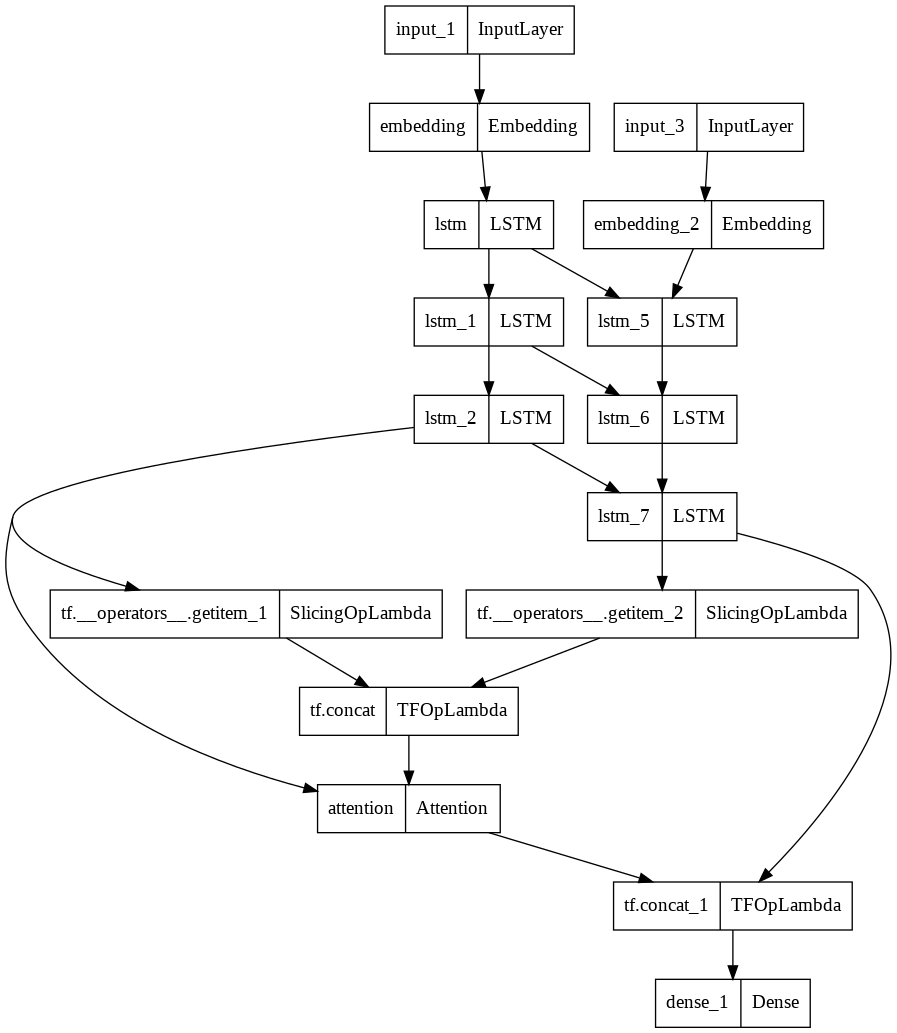

In [28]:
tf.keras.utils.plot_model(model, to_file='model.png' )

## 훈련된 모델로 번역하기

* 평가 함수는 여기서 *교사 강요(teacher forcing)*를 사용하기 못하는 것을 제외하고는 훈련 루프와 비슷합니다. 각 마지막 시점(time step)에서 이전 디코더 인코더의 결과와 은닉 상태(hidden state)를 가진 예측 값을 디코더에 입력합니다.

    1. 번역하고자 하는 입력 문장이 인코더로 입력되어 인코더의 마지막 시점의 은닉 상태와 셀 상태를 얻습니다.
    2. 인코더의 은닉 상태와 셀 상태, 그리고 토큰 <sos>를 디코더로 보냅니다.
    3. 디코더가 토큰 <eos>가 나올 때까지 다음 단어를 예측하는 행동을 반복합니다.

In [114]:
# 인코더 - 훈련과 동일 
encoder_model = Model(encoder_inputs, [encoder_outputs3, total_encoder_states])

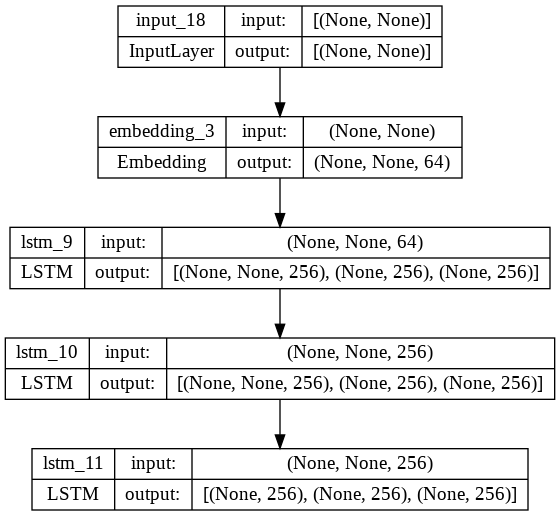

In [122]:
tf.keras.utils.plot_model(encoder_model, to_file='enc_model.png', show_shapes=True )

In [136]:
encoder_model.predict(input_seq)[0]

1/1 [==============================] - 0s 30ms/step


array([[ 2.3623926e-03,  1.9247509e-03, -1.5500750e-04, -9.0978211e-03,
        -2.4240655e-03, -1.5542771e-03, -2.1236080e-03, -1.0150711e-02,
         4.9898564e-03,  7.2738864e-03,  1.0876016e-02, -1.6313916e-03,
         1.9551239e-03,  7.6342875e-04,  2.9206141e-03, -9.9062389e-03,
        -2.8458303e-03, -1.8749688e-03, -1.4648751e-02,  1.6877839e-03,
        -3.5197018e-03,  1.0148870e-03, -6.9911894e-03, -1.0448524e-03,
         6.9288688e-04, -8.4899322e-05, -2.5736466e-03,  5.6111901e-03,
         6.3165086e-03, -2.3779082e-03,  5.8431509e-03, -1.2452461e-04,
        -3.7862875e-03, -2.9058924e-03, -2.0625517e-03, -2.0617936e-03,
        -3.2785092e-03, -2.3948150e-03,  2.2990371e-03,  1.6273892e-03,
        -2.4320141e-03,  1.6684418e-03, -1.3959626e-03, -4.4601872e-03,
        -2.4301624e-03, -2.1553822e-03, -2.6896945e-03, -1.3488382e-03,
         8.2565220e-03,  7.2514755e-04,  5.3163124e-03, -2.6412194e-03,
         8.4063262e-03,  1.0588482e-02, -7.8805233e-04,  1.18520

In [130]:
len(encoder_model.predict(input_seq)[1])

1/1 [==============================] - 0s 25ms/step


6

In [133]:
len(encoder_model.predict(input_seq)[1][0][0])

1/1 [==============================] - 0s 22ms/step


256

In [138]:
test = encoder_model.predict(input_seq)

1/1 [==============================] - 0s 21ms/step


NameError: ignored

In [69]:
# 디코더 

# 이전 시점의 상태를 보관할 텐서
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))
decoder_state_input_h2 = Input(shape=(hidden_units,))
decoder_state_input_c2 = Input(shape=(hidden_units,))
decoder_state_input_h3 = Input(shape=(hidden_units,))
decoder_state_input_c3 = Input(shape=(hidden_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c, decoder_state_input_h2, decoder_state_input_c2, decoder_state_input_h3, decoder_state_input_c3]

query_vec = Input(shape=(hidden_units,))
encoder_outputs4 = Input(shape =(None, hidden_units,))


# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
decoder_outputs4, state_h4, state_c4 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
decoder_outputs5, state_h5, state_c5 = decoder_lstm2(decoder_outputs4, initial_state=[decoder_state_input_h2, decoder_state_input_c2])
decoder_outputs6, state_h6, state_c6 = decoder_lstm3(decoder_outputs5, initial_state=[decoder_state_input_h3, decoder_state_input_c3])
decoder_states6 = [state_h4, state_c4, state_h5, state_c5, state_h6, state_h6]

# Attention
S_ = tf.concat([query_vec[:, tf.newaxis, :], decoder_outputs6[:, :-1, :]], axis=1) # query 

context_vector, att_score = attention([S_, encoder_outputs4], return_attention_scores = True)
decoder_concat = tf.concat([decoder_outputs6, context_vector], axis=-1)

# 모든 시점에 대해서 단어 예측 (Fully Connected)
decoder_outputs6 = decoder_dense(decoder_concat)

# 수정된 디코더
decoder_model = Model(
    [decoder_inputs, query_vec, encoder_outputs4] + decoder_states_inputs,
    [decoder_outputs6, att_score] + decoder_states6)

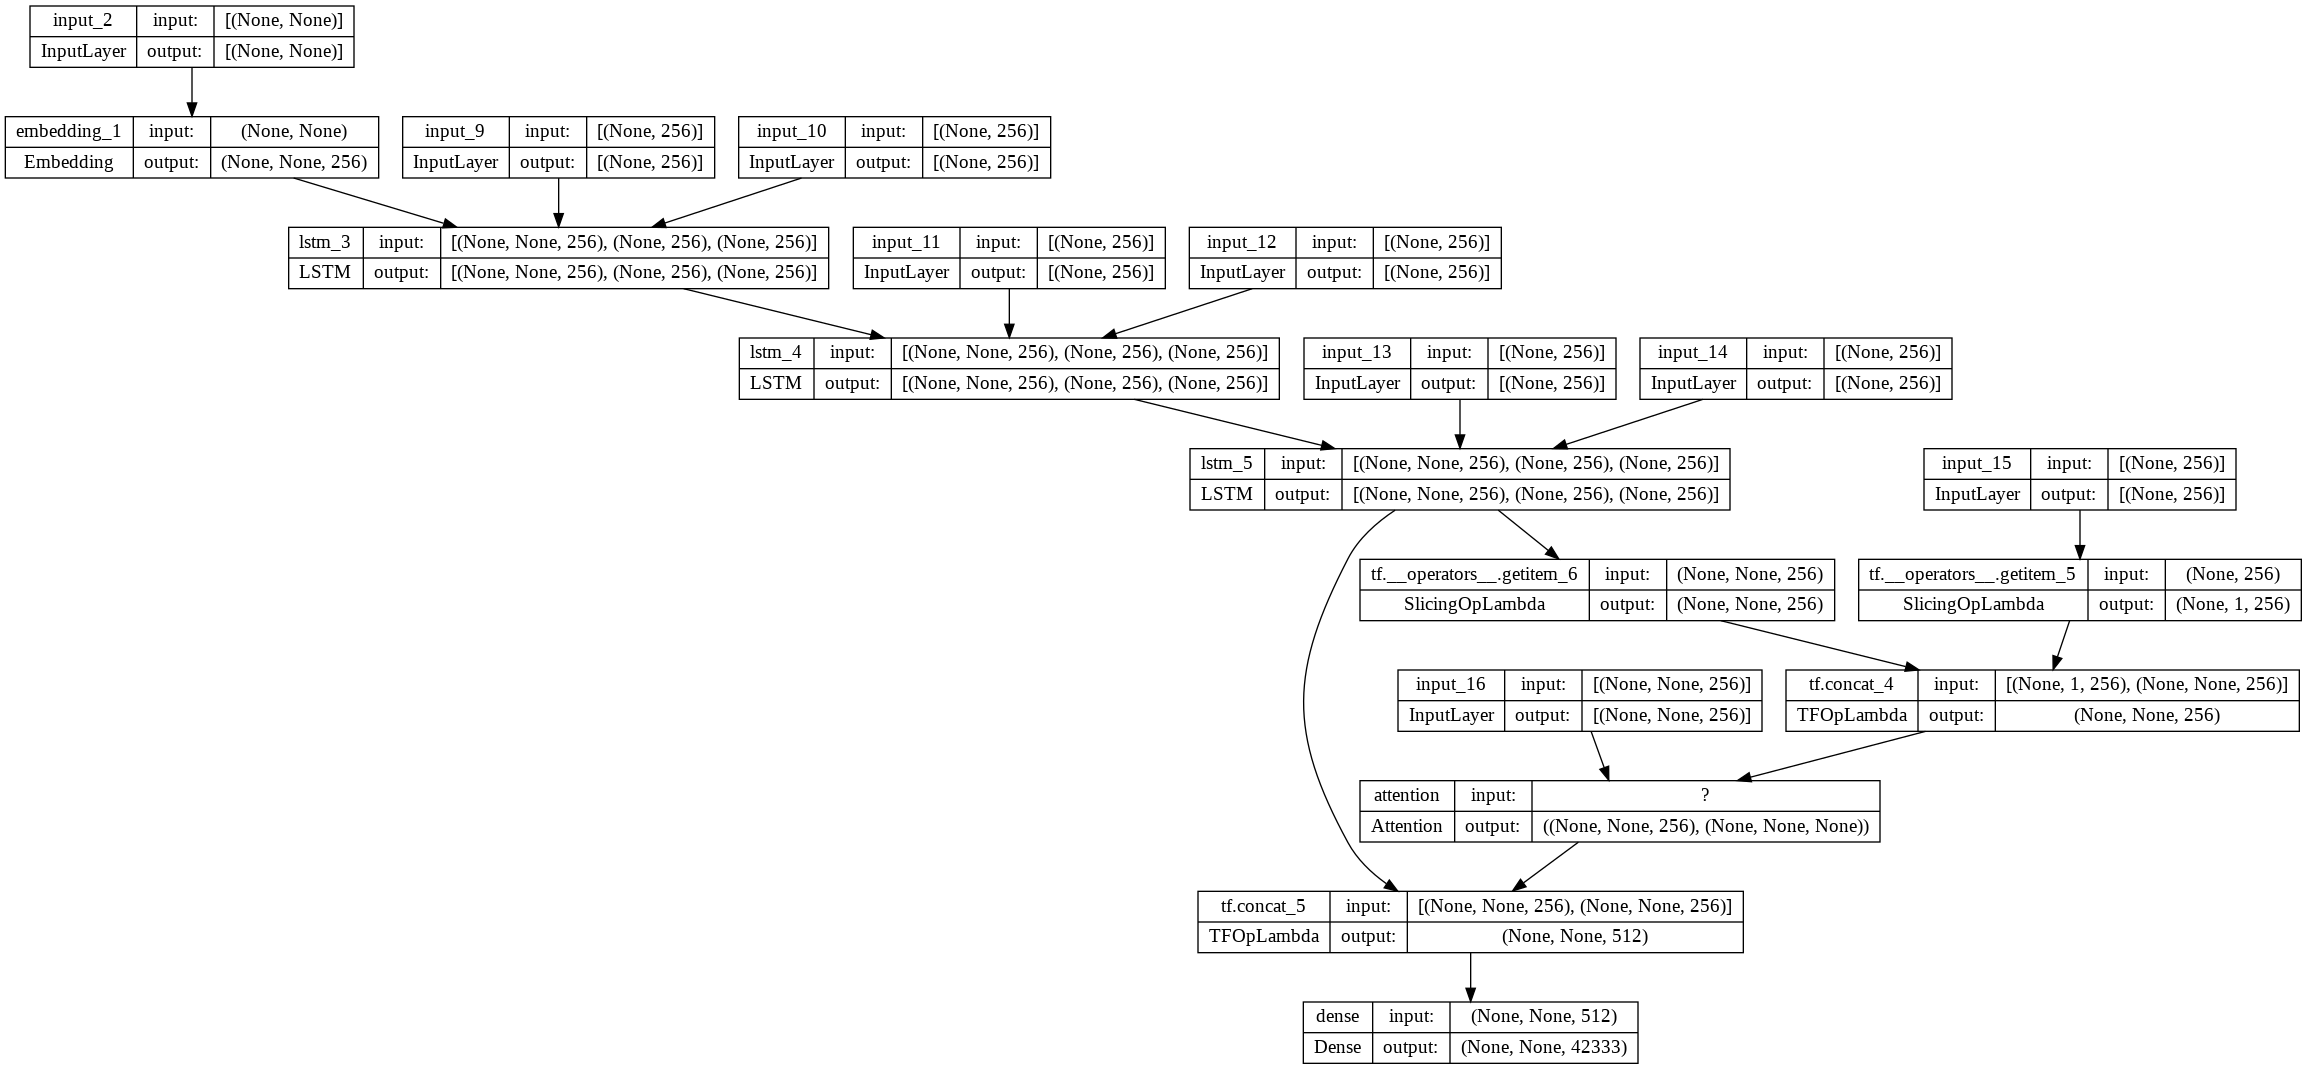

In [144]:
tf.keras.utils.plot_model(decoder_model, to_file='dec_model.png', show_shapes=True )

In [143]:
decoder_model.predict()

ValueError: ignored

테스트 단계에서의 동작을 위한 decode_sequence 함수를 구현합니다. 
1. 입력 문장이 들어오면 인코더는 마지막 시점까지 전개하여 마지막 시점의 은닉 상태와 셀 상태를 리턴합니다. -> `states_value` 
2. 디코더의 초기 입력으로 <SOS>를 준비합니다. -> `target_seq`
3. 이 두 가지 입력을 가지고 while문 안으로 진입하여 이 두 가지를 디코더의 입력으로 사용합니다. 
4. 이제 디코더는 현재 시점에 대해서 예측합니다. 
    - 예측 벡터로부터 현재 시점의 예측 단어인 target_seq를 얻고, h와 c 이 두 개의 값은 states_value에 저장합니다. 
    - while문의 다음 루프. 즉, 두번째 시점의 디코더의 입력으로 다시 target_seq와 states_value를 사용합니다. 
    - 이를 현재 시점의 예측 단어로 <eos>를 예측하거나 번역 문장의 길이가 50이 넘는 순간까지 반복합니다. 
5. 각 시점마다 번역된 다어는 decoded_sentence에 누적하여 저장하였다가 최종 번역 시퀀스로 리턴합니다.

In [101]:
sentence = "다른 선수들이 몬스터를 사냥할 경우 당신은 추가 경험치를 획득해요."

sentence = preprocess_sentence(sentence)
tokens = sentence.split(" ")

inputs = tokenizer_kor.texts_to_sequences([tokens])

inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                        maxlen=16,
                                                        padding='post')

inputs
# tf.convert_to_tensor(inputs)

array([[   36,  5684, 24918, 73545,   259,    14,   520, 73546, 73547,
            1,     0,     0,     0,     0,     0,     0]], dtype=int32)

In [118]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 마지막 시점의 상태(은닉 상태, 셀 상태)를 얻음
  encoder_outputs4, states_value = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 정수 생성
  target_seq = np.zeros((1,1))
  target_seq[0, 0] = tar_to_index['<sos>']

  stop_condition = False
  decoded_sentence = ''

  # stop_condition이 True가 될 때까지 루프 반복
  # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
  while not stop_condition:
    # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
    output_tokens, att_score, h, c, h2, c2, h3, c3 = decoder_model.predict([target_seq, states_value[0], encoder_outputs] + states_value, verbose = 0)

    # 예측 결과를 단어로 변환
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_char = index_to_tar[sampled_token_index]

    # 현재 시점의 예측 단어를 예측 문장에 추가
    decoded_sentence += ' '+sampled_char

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sampled_token_index

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h, c, h2, c2, h3, c3]

    # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
    if (sampled_char == '<eos>' or len(decoded_sentence) > 200):
        stop_condition = True

  return decoded_sentence

In [117]:
def decode_sequence(sentence):
    # 입력으로부터 인코더의 마지막 시점의 상태(은닉 상태, 셀 상태)를 얻음
    max_src_len, max_tar_len  = 15, 9

    attention_plot = np.zeros((max_tar_len, max_src_len))

    sentence = preprocess_sentence(sentence)
    tokens = sentence.split(" ")

    inputs = tokenizer_kor.texts_to_sequences([tokens])

    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                            maxlen=max_src_len,
                                                            padding='post')
    encoder_test, states_value = encoder_model.predict(inputs)

    # <SOS>에 해당하는 정수 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_to_index['<sos>']

    stop_condition = False
    decoded_sentence = ''

    # stop_condition이 True가 될 때까지 루프 반복
    # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
    for t in range(max_tar_len):
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, att_score, h, c = decoder_model.predict([target_seq, states_value[0], encoder_test] + states_value, verbose = 0)

        # 어텐션 가중치 시각화를 위해 저장 
        att_score = tf.reshape(att_score, (-1, ))
        attention_plot[t] = att_score.numpy() 

        # 예측 결과를 단어로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]

        # 현재 시점의 예측 단어를 예측 문장에 추가
        decoded_sentence += ' '+sampled_char


        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

        # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
        if sampled_char == '<eos>':
            break 

    return sentence, decoded_sentence, attention_plot

결과 확인을 위한 함수를 만듭니다.

In [93]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0):
      sentence = sentence + index_to_src[encoded_word] + ' '
  return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0 and encoded_word != tar_to_index['<eos>']):
    # if(encoded_word != 0 and encoded_word != tar_to_index['<sos>'] and encoded_word != tar_to_index['<eos>']):
      sentence = sentence + index_to_tar[encoded_word] + ' '
  return sentence

In [119]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_train[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("입력문장 :",seq_to_src(encoder_input_train[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_train[seq_index]))
  print("번역문장 :",decoded_sentence[1:-5])
  print("-"*50)

1/1 [==============================] - 1s 1s/step


TypeError: ignored

In [77]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_attention(attention, sentence, predicted_sentence):
    # you need to change the fname based on your system, and the Chinese can be displayed in the plot
    # font = FontProperties(fname=r"./data/TaipeiSansTCBeta-Regular.ttf", size=14)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    # set the x-tick/y-tick labels with list of string labels
    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation = 90)
    ax.set_yticklabels(predicted_sentence, fontdict=fontdict)

    # set tick locators
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()

In [76]:
def translate_train(seq_index):
  input_seq = encoder_input_train[seq_index: seq_index + 1]

  sentence = seq_to_src(encoder_input_train[seq_index]).strip()
  _, result, attention_plot = decode_sequence(sentence)

  print('Input: %s' % (sentence))
  print("Right translation :",seq_to_tar(decoder_input_train[seq_index]))
  print('Predicted translation: {}'.format(result))

#   attention_plot = attention_plot[:len(result.split(' '))-2, :len(sentence.split(' '))]
#   plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [78]:
indices = np.random.randint(10000, size = (5,))
print(indices)
for seq_index in indices:
    translate_train(seq_index)
    print("-"*50)

[1306 6097 8579 5717  764]
1/1 [==============================] - 3s 3s/step


ValueError: ignored

In [79]:
def translate_test(seq_index):
  input_seq = encoder_input_test[seq_index: seq_index + 1]

  sentence = seq_to_src(encoder_input_test[seq_index]).strip()
  _, result, attention_plot = decode_sequence(sentence)

  print('Input: %s' % (sentence))
  print("Right translation :",seq_to_tar(decoder_input_train[seq_index]))
  print('Predicted translation: {}'.format(result))

#   attention_plot = attention_plot[:len(result.split(' '))-2, :len(sentence.split(' '))]
#   plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [80]:

indices = np.random.randint(1000, size = (5,))

for seq_index in indices:
  translate_test(seq_index)
  print("-"*50)

1/1 [==============================] - 0s 15ms/step


ValueError: ignored

In [ ]:
def translate(sentence):
  sentence, result, attention_plot = decode_sequence(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

#   attention_plot = attention_plot[:len(result.split(' '))-2, :len(sentence.split(' '))]
#   plot_attention(attention_plot, sentence.split(' '), result.split(' '))

In [ ]:
# What are you doing now? 
translate(u'Qu est-ce que tu fais maintenant ?')

1/1 [==============================] - 0s 15ms/step
Input: qu est ce que tu fais maintenant ?
Predicted translation:  what do you need ? <eos>


In [ ]:
translate(u'Je parle français.')

1/1 [==============================] - 0s 16ms/step
Input: je parle francais .
Predicted translation:  i speak french . <eos>


In [ ]:
translate(u'La vie est amusante.')

1/1 [==============================] - 0s 17ms/step
Input: la vie est amusante .
Predicted translation:  life is fun . <eos>


In [ ]:
translate('je n en suis pas si sur !')

1/1 [==============================] - 0s 15ms/step
Input: je n en suis pas si sur !
Predicted translation:  i m not so sure . <eos>


## BLEU Score (Bilingual Evaluation Understudy Score)
기계 번역의 성능이 얼마나 뛰어난가를 측정하기 위해 사용되는 대표적인 방법 중 하나인 BLEU(Bilingual Evaluation Understudy)를 측정해봅시다. 
- 논문 : BLEU: a Method for Automatic Evaluation of Machine Translation
- BLEU 점수는 기계 번역된 텍스트와 고품질 참조 번역 세트의 유사성을 측정하는 0과 1 사이의 숫자입니다. 
    - 값이 0이면 기계 번역된 출력이 참조 번역과 겹치는 부분이 없는 것을 의미하고(저품질)
    - 1이면 참조 번역과 완벽하게 겹치는 것을 의미합니다(고품질)

- BLEU 설명 
    - https://jrc-park.tistory.com/273
    - https://wikidocs.net/31695
    - https://cloud.google.com/translate/automl/docs/evaluate?hl=ko#bleu

In [30]:
import numpy as np
from collections import Counter
from nltk import ngrams

BLEU는 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하여 번역에 대한 성능을 측정하는 방법입니다. 

In [31]:
import nltk.translate.bleu_score as bleu

candidate = '다른 선수들이 몬스터를 사냥할 경우 당신은 추가 경험치를 획득해요.'
references = [
    'If other players hunt monsters, you gain additional experience.'
]

print('패키지 NLTK의 BLEU :',bleu.sentence_bleu(list(map(lambda ref: ref.split(), references)),candidate.split()))

패키지 NLTK의 BLEU : 0


In [ ]:
ref_train = [seq_to_tar(sen) for sen in decoder_input_train[:100]]

In [ ]:
from tqdm.notebook import tqdm 

pred_train = []
for idx in tqdm(range(len(encoder_input_train[:100]))):
    pred_train.append(decode_sequence(encoder_input_train[idx:idx+1]))

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
bleu_score = 0
for ref, pred in zip(ref_train, pred_train):
    if len(ref) == 0 or len(pred) == 0:
        continue
    bleu_score += bleu.sentence_bleu(ref, pred)

bleu_score = bleu_score/len(ref_train)
bleu_score

In [ ]:
ref_test = [seq_to_tar(sen) for sen in decoder_input_test[:100]]
pred_test = [decode_sequence(encoder_input_test[idx:idx+1]) for idx in tqdm(range(len(encoder_input_test[:100])))]

bleu_score = 0
for ref, pred in zip(ref_test, pred_test):
    if len(ref) == 0 or len(pred) == 0:
        continue
    bleu_score += bleu.sentence_bleu(ref, pred)

bleu_score = bleu_score/len(ref_test)
bleu_score

### Reference

- https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
- https://wikidocs.net/86900

## 모델 확인


In [32]:
# 번역(translation) 함수
def translate_sentence(sentence, src_field, trg_field, model, device, max_len=50):
    model.eval() # 평가 모드

    if isinstance(sentence, str):
        nlp = spacy.load('de')
        tokens = [token.text.lower() for token in nlp(sentence)]
    else:
        tokens = [token.lower() for token in sentence]

    # 처음에  토큰, 마지막에  토큰 붙이기
    tokens = [src_field.init_token] + tokens + [src_field.eos_token]
    print(f"전체 소스 토큰: {tokens}")

    src_indexes = [src_field.vocab.stoi[token] for token in tokens]
    print(f"소스 문장 인덱스: {src_indexes}")

    src_tensor = torch.LongTensor(src_indexes).unsqueeze(1).to(device)

    # 인코더(endocer)에 소스 문장을 넣어 문맥 벡터(context vector) 계산
    with torch.no_grad():
        hidden, cell = model.encoder(src_tensor)

    # 처음에는  토큰 하나만 가지고 있도록 하기
    trg_indexes = [trg_field.vocab.stoi[trg_field.init_token]]

    for i in range(max_len):
        # 이전에 출력한 단어가 현재 단어로 입력될 수 있도록
        trg_tensor = torch.LongTensor([trg_indexes[-1]]).to(device)

        with torch.no_grad():
            output, hidden, cell = model.decoder(trg_tensor, hidden, cell)

        pred_token = output.argmax(1).item()
        trg_indexes.append(pred_token) # 출력 문장에 더하기

        # 를 만나는 순간 끝
        if pred_token == trg_field.vocab.stoi[trg_field.eos_token]:
            break

    # 각 출력 단어 인덱스를 실제 단어로 변환
    trg_tokens = [trg_field.vocab.itos[i] for i in trg_indexes]

    # 첫 번째 는 제외하고 출력 문장 반환
    return trg_tokens[1:]
     

In [35]:
!gdown --id 1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V6HsBoEczDoo4NDZ1I5iXSfRxFxCatis
To: /content/1_구어체(1).xlsx
100% 15.8M/15.8M [00:00<00:00, 56.0MB/s]


In [37]:
import pandas as pd

df = pd.read_excel('/content/1_구어체(1).xlsx')
df

,SID,원문,번역문
0,1,'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...,Bible Coloring' is a coloring application that...
1,2,씨티은행에서 일하세요?,Do you work at a City bank?
2,3,푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.,"PURITO's bestseller, which recorded 4th rough ..."
3,4,11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.,In Chapter 11 Jesus called Lazarus from the to...
4,5,"6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.",I would feel grateful to know how many stocks ...
...,...,...,...
199995,199996,나는 먼저 청소기로 바닥을 밀었어요.,"First of all, I vacuumed the floor."
199996,199997,나는 먼저 팀 과제를 하고 놀러 갔어요.,I did the team assignment first and went out t...
199997,199998,나는 비 같은 멋진 연예인을 좋아해요.,I like cool entertainer like Rain.
199998,199999,나는 멋진 자연 경치를 보고 눈물을 흘렸어.,I cried seeing the amazing scenery.


In [43]:
vars(df['원문'][10])

TypeError: ignored

In [47]:
example_idx = 10

src = df['원문'][10]
trg = df['번역문'][10]

print(f'소스 문장: {src}')
print(f'타겟 문장: {trg}')
print("모델 출력 결과:", " ".join(translate_sentence(src, SRC, TRG, model, device)))

소스 문장: 나는 친구에게 그 철학자의 책을 선물해 주겠다고 말했습니다.
타겟 문장: I told my friends that I will give you the philosopher's book as a gift.


NameError: ignored

In [50]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [53]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [55]:
doc = nlp("This is a test sentence.")
for token in doc:
    print(token.text, token.pos_)

This PRON
is AUX
a DET
test NOUN
sentence NOUN
. PUNCT


In [56]:
doc = model("안녕")
for token in doc:
    print(token.text, token.pos_)

TypeError: ignored